# POD 1

<h1 style = "color:darkslateblue"> Proyecto de Open Data 1: Encuestas StackOverflow </h1>


<h3 style = "color:darkslateblue"> Andrés Fernández y Enrique Marín </h3>

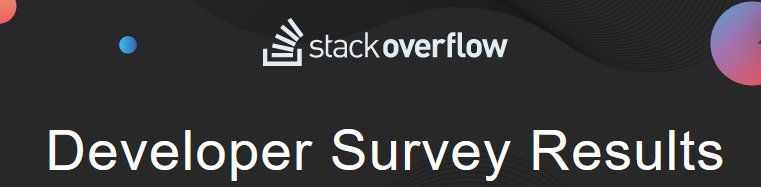

In [194]:
import IPython.display
IPython.display.Image("images/título.png")

StackOverflow es la principal plataforma de preguntas y respuestas en lengua inglesa para desarrolladores. Cada año realiza una encuesta entre todos sus usuarios, con preguntas relativas a la demografía (edad, sexo, país), su situación laboral, las características de su empresa, la compensación económica y las tecnologías que utilizan o que les gustaría aprender.

Como estudiantes en un grado de análisis de datos, nos ha parecido interesante analizar las respuestas a esta encuesta para conocer las tendencias en el mercado laboral al que nos vamos a incorporar. Nuestro principal objetivo es estudiar el salario de los programadores y los factores que influyen en él, de cara a orientar nuestros esfuerzos a aprender las tecnologías más demandadas y con más aceptación entre las empresas.

Los conjuntos de datos empleados en este trabajo están disponibles públicamente en [https://insights.stackoverflow.com/survey/](https://insights.stackoverflow.com/survey/).

<h1 style = "color:#bb0000">Índice</h1>

1. **Carga y limpieza de datos**
    * Año 2021
    * Años 2017 a 2020

2. **Análisis exploratorio**
    * Análisis de tipos
    * Conversión a datos numéricos
    * Vista general
    * Distribución por países
    * Distribución por sexo
    * Nivel de estudios
    * Distribución del sueldo
    * Comparación de sueldo por género

3. **Estudio del mercado laboral**
    * Uso de nubes
    * API de Twitter
    * Lenguajes utilizados
    * Análisis de competitividad de los sueldos
    * Scrapy
    * Correlaciones para el sueldo
    * Correlación con el uso de la nube

4. **Conclusiones**


<h1 style = "color:#009900">Apartado 1: Carga y limpieza de datos</h1>

En primer lugar, cargamos las librerías de Python que vamos a utilizar en el proyecto:

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

A continuación utilizamos Pandas para leer los datasets y almacenarlos en un DataFrame.

**Nota**: no hemos incluido los datasets originales junto al notebook debido a su tamaño (unos 600 MB en total).  Se pueden descargar en estos enlaces: [2021](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip), [2020](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2020.zip), [2019](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2019.zip), [2018](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2018.zip), [2017](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2017.zip). Los archivos .csv incluidos en el archivo comprimido corresponden al estado de los datasets una vez concluida la limpieza y filtrado de datos.

In [196]:
#Cargamos las tablas originales 

original2021 = pd.read_csv("survey_results_public2021.csv", dtype='unicode')
original2020 = pd.read_csv("survey_results_public2020.csv", dtype='unicode')
original2019 = pd.read_csv("survey_results_public2019.csv", dtype='unicode')
original2018 = pd.read_csv("survey_results_public2018.csv", dtype='unicode')
original2017 = pd.read_csv("survey_results_public2017.csv", dtype='unicode')

### Año 2021

Con el comando head podemos hacernos una idea inicial del contenido y el formato del dataset.

In [197]:
original2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [198]:
print("El tamaño del dataframe es de",original2021.shape[0],"filas y",original2021.shape[1],"columnas.")

El tamaño del dataframe es de 83439 filas y 48 columnas.


Cada fila en el conjunto de datos almacena las respuestas a la encuesta de un programador. En 2021 un total de 83.439 programadores respondieron a la encuesta.

A continuación describimos el significado de cada una de las columnas:

#### Información geográfica

* **Country**: el país de residencia del encuestado.
* **US_State**, **UK_Country**: columnas que contienen información geográfica más detallada para los habitantes de Estados Unidos y el Reino Unido, y están vacías en todos los demás casos. Las eliminamos ya que el país de procedencia es suficiente información geográfica para nuestro estudio.

#### Información económica

* **CompTotal**: salario que recibe el programador.
* **CompFreq**: periodicidad de cobro (mensual o anual).
* **Currency**: moneda en la que cobra.
* **ConvertedCompYearly**: salario total que recibe el programador al año, tras realizar la conversión desde su moneda a dólares.

La última de estas columnas se calcula a partir de las otras tres e incluye toda la información contenida en ellas. Por este motivo, es la única columna que vamos a conservar.

Es importante tener en cuenta que esta información corresponde al salario bruto (antes de impuestos).

#### Educación

* **EdLevel**: nivel de estudios que ha completado. Aunque la escalera de niveles educativos puede ser completamente diferente en países distintos, la encuesta está diseñada de forma que los resultados sean comparables.
* **LearnCode**: el método o métodos empleados por el programador para aprender.
* **Age1stCode**: edad a la que empezó a programar.
* **YearsCode**: años que ha empleado programando.
* **YearsCodePro**: años de experiencia laboral como programador. 

Como estamos interesados principalmente en realizar un análisis de los salarios y tendencias del mercado laboral y no tanto en las trayectorias educativas de cada programador, hemos decidido conservar únicamente el nivel de estudios (EdLevel) y los años de experiencia laboral como programador (YearsCodePro).

#### Situación laboral

* **MainBranch**: nos indica si el encuestado es un programador profesional, un aficionado o un estudiante.
* **Employment**: el régimen de empleo del encuestado: asalariado a tiempo total o parcial, consultor o estudiante.
* **OrgSize**: tamaño de la empresa.

Conservamos estas tres columnas, por ser claves para un análisis del mercado laboral.

#### Tecnologías empleadas

Hay una docena de columnas relativas a las tecnologías y lenguajes que el programador ha utilizado en su trabajo, o que le gustaría utilizar.

* **LanguageHaveWorkedWith**, **LanguageWantToWorkWith**: lenguajes de programación (JavaScript, Python, Java...)
* **DatabaseHaveWorkedWith**, **DatabaseWantToWorkWith**: bases de datos (MySQL, PostgreSQL...)
* **PlatformHaveWorkedWith**, **PlatformWantToWorkWith**: tecnologías en la nube (AWS, Google Cloud, Azure...)
* **WebframeHaveWorkedWith**, **WebframeWantToWorkWith**: frameworks de desarrollo web
* **MiscTechHaveWorkedWith**, **MiscTechWantToWorkWith**: tecnologías no incluidas en el resto de apartados
* **ToolsTechHaveWorkedWith**, **ToolsTechWantToWorkWith**: herramientas de desarrollo (IDEs, editores de texto, etc.)
* **NEWCollabToolsHaveWorkedWith**, **NEWCollabToolsWantToWorkWith**: herramientas de colaboración
* **OpSys**: sistema operativo (Windows, Linux, Mac)

Por último, la columna **DevType** nos muestra el ámbito en el que trabaja el programador: frontend, backend, aplicaciones móviles, investigación...

La información más útil para nosotros está contenida en las columnas terminadas en HaveWorkedWith. Dentro de estas columnas, como estudiantes en un grado de análisis de datos estamos particularmente interesados en las tecnologías en la nube, bases de datos y lenguajes de programación. 

#### Uso de StackOverflow

La encuesta incluye varias preguntas sobre el uso de la plataforma StackOverflow; las respuestas se incluyen en **NEWSOSites**, **SOVisitFreq**, **SOAccount**, **SOPartFreq**, **SOComm**. Además hay una pregunta relativa al uso de otras comunidades on-line: **NEWOtherComms**, y dos preguntas relativas al tamaño y la facilidad de uso de la encuesta en sí: **SurveyLength** y **SurveyEase**.

Hemos eliminado todas estas columnas, ya que no estamos interesados en información específica sobre StackOverflow u otras comunidades de programadores.

#### Demografía

La información demográfica está almacenada en las columnas **Age**, **Gender**, **Trans**, **Sexuality**, **Ethnicity**, **Accessibility** y **MentalHealth**.

El objetivo de nuestro estudio no es únicamente analizar el mercado laboral, sino aplicar las conclusiones obtenidas para encontrar las tecnologías y métodos que tengan más demanda y poder priorizarlas en nuestros estudios. La información relativa a la demografía resulta poco interesante desde este punto de vista: como estudiantes podemos elegir las tecnologías que aprendemos, pero no podemos modificar nuestras características demográficas. Además, todas estas preguntas eran opcionales en la encuesta original, y una proporción considerable de los encuestados eligió no responder a ellas.

Por este motivo, vamos a realizar únicamente un análisis básico de la distribución del género y su evolución en el tiempo, y no vamos a incluir las demás columnas.

#### Metadatos

* **ResponseId**: código numérico único asociado a cada respuesta. Lo eliminamos ya que no aporta ninguna información nueva: los DataFrames numeran las filas automáticamente.

Seleccionamos las columnas que hemos decidido conservar, y las traducimos al español para una mejor comprensión y visualización:

In [199]:
original2021v2 = original2021[['MainBranch', 'Employment', 'Country', 'EdLevel', 
                               'YearsCodePro', 'OrgSize','ConvertedCompYearly','LanguageHaveWorkedWith', 'PlatformHaveWorkedWith',
                               'DatabaseHaveWorkedWith', 'OpSys', 'Gender']]
original2021v2.rename(columns={'MainBranch':'PosicionActual', 'Employment':'Empleo', 'Country':'Pais', 
                               'EdLevel':'NivelEducacion', 
                               'YearsCodePro':'AñosProgramandoProfesionalmente','OrgSize':'TamañoEmpresa',
                               'ConvertedCompYearly':'SueldoAnual','LanguageHaveWorkedWith':'LenguajesUsados',
                               'PlatformHaveWorkedWith':'NubeUsada','DatabaseHaveWorkedWith':'BDDUsadas', 'OpSys':'SistemaOperativo',
                               'Gender':'Sexo'}, inplace=True)

El dataset incluye respuestas de programadores en activo, estudiantes, programadores aficionados y profesionales de otras ramas del conocimiento. Sólo nos interesa la información correspondiente a los programadores profesionales que están trabajando en la actualidad y forman parte activa del mercado laboral. Por este motivo, vamos a eliminar el resto de filas.

In [200]:
datos2021 = original2021v2[original2021v2['PosicionActual'] == "I am a developer by profession" ]
datos2021.head()

,PosicionActual,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,SueldoAnual,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,Sexo
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,20 to 99 employees,62268,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,NaN,PostgreSQL;SQLite,MacOS,Man
3,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,100 to 499 employees,NaN,JavaScript;TypeScript,NaN,NaN,Windows,Man
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Just me - I am a freelancer, sole proprietor, ...",NaN,Bash/Shell;HTML/CSS;Python;SQL,NaN,Elasticsearch;PostgreSQL;Redis,Linux-based,Man
8,I am a developer by profession,Employed part-time,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"10,000 or more employees",NaN,HTML/CSS;JavaScript,AWS,PostgreSQL,Windows,Man
9,I am a developer by profession,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,51552,C++;Python,NaN,PostgreSQL,Linux-based,Man


In [201]:
print("El tamaño del dataframe es de",datos2021.shape[0],"filas y",datos2021.shape[1],"columnas.")

El tamaño del dataframe es de 58153 filas y 12 columnas.


Comprobamos que nuestro dataset filtrado tiene un tamaño suficiente para poder obtener conclusiones fiables de su análisis.

A continuación vamos a analizar si existen valores faltantes en nuestro dataset.

In [202]:
datos2021.isnull().sum()

En el caso de las preguntas relativas a las tecnologías utilizadas, resulta razonable la existencia de valores faltantes, que nos indican que el programador no utiliza ninguna de las tecnologías en el ámbito de la pregunta, o bien utiliza herramientas que no estaban incluidas entre las opciones en la encuesta. Por ejemplo, unos 18.000 de los más de 80.000 encuestados no trabajan con plataformas en la nube, y 79 utilizan sistemas operativos no estándar. En estos casos, los valores faltantes no representan un error, y la única corrección que realizamos es reemplazarlos por el string "Ninguno". 

En el resto de columnas categóricas, la existencia de valores faltantes sí representa la ausencia de información, por lo que debemos corregirlo. Hemos elegido reemplazar los valores faltantes con la moda de la columna correspondiente; en ausencia de otros elementos que puedan informar nuestra decisión, consideramos que es razonable seleccionar la respuesta más común como reemplazo.

In [203]:
datos2021['LenguajesUsados'].fillna("Ninguno", inplace=True)
datos2021['NubeUsada'].fillna("Ninguno", inplace=True)
datos2021['BDDUsadas'].fillna("Ninguno", inplace=True)
datos2021['SistemaOperativo'].fillna("Ninguno", inplace=True)
datos2021['Sexo'].fillna("No contesta", inplace=True)
datos2021['Empleo'].fillna((datos2021['Empleo'].mode()[0]), inplace=True)
datos2021['NivelEducacion'].fillna((datos2021['NivelEducacion'].mode()[0]), inplace=True)
datos2021['TamañoEmpresa'].fillna((datos2021['TamañoEmpresa'].mode()[0]), inplace=True)
datos2021['AñosProgramandoProfesionalmente'].fillna((datos2021['AñosProgramandoProfesionalmente'].mode()[0]), inplace=True)

Por último, en lo relativo al sueldo anual, hemos considerado apropiado reemplazar los valores faltantes por la mediana del sueldo agrupado por países. Usar la mediana en vez de la media reduce la influencia de los valores extremos, y agrupamos por países porque el lugar de residencia tiene una gran influencia en las condiciones salariales.

In [204]:

# Solución obtenida de https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group/53339320#53339320
datos2021['SueldoAnual'] = datos2021['SueldoAnual'].fillna(datos2021.groupby('Pais')['SueldoAnual'].transform('median'))

/opt/python/envs/default/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice



La advertencia obtenida nos indica que hay al menos un país para el que no tenemos información de sueldo (ya que ninguno de los programadores residentes en él han indicado su sueldo en la encuesta). En este caso, la única opción es reemplazar los valores faltantes con la mediana global del sueldo.

In [205]:
datos2021['SueldoAnual'].fillna((datos2021['SueldoAnual'].median()), inplace=True)

Por último, comprobamos que ya no existen valores faltantes:

In [206]:
datos2021.isnull().sum()

### Años 2017 a 2020

Nuestro análisis se va a centrar en la situación actual del mercado.

Sin embargo, también consideramos que es relevante para nuestro estudio evaluar la evolución en el tiempo de la adopción de tecnologías en la nube, de cara a comprobar si, como creemos, el uso de estas plataformas está en aumento en los últimos años. Además, la industria de las tecnologías de la información es conocida por las grandes diferencias entre el número de hombres y mujeres, y nos ha parecido interesante comprobar si en años recientes se han producido avances en ese sentido.

Las encuestas realizadas por StackOverflow cambian ligeramente de año a año, por lo que hay pequeñas diferencias en la estructura de los datasets. Por este motivo hemos tenido que realizar algunas adaptaciones en el proceso de limpieza de datos y cambiar algunas diferencias de lenguaje usadas.

In [207]:
original2020v2 = original2020[['MainBranch','PlatformWorkedWith','Gender']]
original2020v2.rename(columns={'MainBranch':'PosicionActual','PlatformWorkedWith':'NubeUsada','Gender':'Sexo'}, inplace=True)
datos2020 = original2020v2[original2020v2['PosicionActual'] == "I am a developer by profession" ]

datos2020['NubeUsada'].fillna("Ninguno", inplace=True)
datos2020['Sexo'].fillna("No contesta", inplace=True)

datos2020.head()

,PosicionActual,NubeUsada,Sexo
0,I am a developer by profession,Windows,Man
1,I am a developer by profession,iOS,No contesta
3,I am a developer by profession,Ninguno,Man
5,I am a developer by profession,Android;Docker;WordPress,Man
6,I am a developer by profession,Ninguno,No contesta


In [208]:
original2019v2 = original2019[['MainBranch','PlatformWorkedWith','Gender']]
original2019v2.rename(columns={'MainBranch':'PosicionActual','PlatformWorkedWith':'NubeUsada','Gender':'Sexo'}, inplace=True)
datos2019 = original2019v2[original2019v2['PosicionActual'] == "I am a developer by profession" ]

datos2019['NubeUsada'].fillna("Ninguno", inplace=True)
datos2019['Sexo'].fillna("No contesta", inplace=True)

datos2019.head()

,PosicionActual,NubeUsada,Sexo
3,I am a developer by profession,Linux;Windows,Man
4,I am a developer by profession,Android;Linux;MacOS;Slack;Windows,Man
6,I am a developer by profession,MacOS;Windows,Man
8,I am a developer by profession,AWS;Docker;Heroku;Linux;MacOS;Slack,Man
9,I am a developer by profession,Linux;Windows,No contesta


En 2018, a falta de una columna que nos informe de si el encuestado está trabajando de desarrollador, usamos si están trabajando a tiempo completo.

In [209]:
original2018v2 = original2018[['Employment','PlatformWorkedWith','Gender']]
original2018v2.rename(columns={'Employment':'PosicionActual','PlatformWorkedWith':'NubeUsada','Gender':'Sexo'}, inplace=True)
original2018v2['Sexo'] = original2018v2['Sexo'].replace({'Male':'Man', 'Female':'Woman'})
datos2018 = original2018v2[original2018v2['PosicionActual'] == "Employed full-time" ]

datos2018['NubeUsada'].fillna("Ninguno", inplace=True)
datos2018['Sexo'].fillna("No contesta", inplace=True)

datos2018.head()

,PosicionActual,NubeUsada,Sexo
1,Employed full-time,Linux,Man
2,Employed full-time,Ninguno,No contesta
3,Employed full-time,Azure,Man
4,Employed full-time,Arduino;Windows Desktop or Server,Man
5,Employed full-time,Linux,Man


De forma similar, en 2017 elegimos si son desarrolladores profesionales.

In [210]:
original2017v2 = original2017[['Professional','HaveWorkedPlatform','Gender']]
original2017v2.rename(columns={'Professional':'PosicionActual','HaveWorkedPlatform':'NubeUsada','Gender':'Sexo'}, inplace=True)
original2017v2['Sexo'] = original2017v2['Sexo'].replace({'Male':'Man', 'Female':'Woman'})
datos2017 = original2017v2[original2017v2['PosicionActual'] == "Professional developer" ]

datos2017['NubeUsada'].fillna("Ninguno", inplace=True)
datos2017['Sexo'].fillna("No contesta", inplace=True)

datos2017.head()

,PosicionActual,NubeUsada,Sexo
2,Professional developer,Ninguno,Man
4,Professional developer,Ninguno,No contesta
7,Professional developer,Amazon Web Services (AWS),Man
8,Professional developer,Android; Microsoft Azure,Man
9,Professional developer,iOS; Amazon Web Services (AWS),Man


Por último, eliminamos la columna `PosicionActual`, ya que tras el filtrado su valor es siempre "Professional developer".

In [211]:
for df in [datos2021, datos2020, datos2019, datos2018, datos2017]:
    df.drop(['PosicionActual'], axis = 1, inplace=True)

Tras concluir el proceso de limpieza y selección de datos, los conjuntos de datos tienen un tamaño más reducido, lo que nos permite incluirlos en el archivo .zip.

In [212]:
datos2021.to_csv("datos2021.csv", index=False)
datos2020.to_csv("datos2020.csv", index=False)
datos2019.to_csv("datos2019.csv", index=False)
datos2018.to_csv("datos2018.csv", index=False)
datos2017.to_csv("datos2017.csv", index=False)

<h1 style = "color:#009900">Apartado 2: Análisis exploratorio</h1>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
datos2021 = pd.read_csv("datos2021.csv")
datos2020 = pd.read_csv("datos2020.csv")
datos2019 = pd.read_csv("datos2019.csv")
datos2018 = pd.read_csv("datos2018.csv")
datos2017 = pd.read_csv("datos2017.csv")

En este apartado vamos a realizar una primera aproximación al conjunto de datos.

## Análisis de tipos

Vamos a comprobar si los tipos de datos seleccionados por Pandas son los adecuados, y a realizar las correcciones necesarias.

In [215]:
datos2021.dtypes

El único valor numérico es el sueldo, representado como un número de punto flotante con 64 bits de precisión. 

El resto de columnas son de tipo `object`, que se utiliza para strings o para columnas que contienen tanto strings como números. Un ejemplo de este último caso es la columna AñosProgramandoProfesionalmente, que contiene en su mayoría valores numéricos, pero también los strings `Less than 1 year` y `More than 50 years` para los programadores a ambos extremos de la campana de Gauss.

Vemos que los tipos que ha elegido Pandas son correctos, aunque hay varias columnas en las que podría ser más útil tener todos los datos en un formato numérico de cara a realizar operaciones con ellos y estudiar correlaciones.

### Conversión a datos numéricos

Vamos a crear unas columnas nuevas en las que pasaremos algunas de las columnas tipo `object` a variables numéricas, para facilitarnos obtener información de ellas más adelante.

La primera que vamos a crear es la del nivel de educación, para esto vamos a cambiar el nivel de educación por números del 1 al 5 de manera ascendente, clasificados por el nivel de complejidad y el tiempo requerido por la formación correspondiente:

* **"Primary/elementary school"** (educación primaria): 1
* **"Secondary school"** (educación secundaria): 2
* **"Some college/university study without earning a degree"** (estudios universitarios no terminados): 2.5
* **"Associate degree"** (equivalente a un grado superior): 3
* **"Bachelor’s degree"** (graduado): 4 
* **"Master’s degree"** (máster): 4.5
* **"Other doctoral degree"** y **"Professional degree"** (doctorado): 5

Asignamos a la opción "Something else" un valor intermedio de 2,5.

In [216]:
datos2021["NivelEducacionNum"] = datos2021["NivelEducacion"]
datos2021["NivelEducacionNum"].value_counts()

niveles = ["Primary/elementary school", 
           "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
           "Some college/university study without earning a degree",
           "Something else",
           "Associate degree (A.A., A.S., etc.)",
           "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",            
           "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
           "Other doctoral degree (Ph.D., Ed.D., etc.)",
           "Professional degree (JD, MD, etc.)", ]

niveles_num = [1, 2, 2.5, 2.5, 3, 4, 4.5, 5, 5]

datos2021["NivelEducacionNum"].replace(niveles, niveles_num, inplace=True)
datos2021["NivelEducacionNum"] = pd.to_numeric(datos2021["NivelEducacionNum"])

La siguiente es el tamaño de la empresa. La encuesta nos proporciona este dato en forma de intervalos, y para hacer la conversión a un tipo numérico sustituimos cada uno de estos intervalos por su valor medio. 

Para reemplazar la opción "No sabe / No contesta" hemos seleccionado 300 personas, por ser el valor medio del intervalo que ocupa la posición central entre los nueve intervalos que ofrecía la encuesta.

In [217]:
datos2021["TamañoEmpresaNum"] = datos2021["TamañoEmpresa"]
intervalos = ["Just me - I am a freelancer, sole proprietor, etc.",
              "2 to 9 employees",
              "10 to 19 employees",
              "20 to 99 employees",
              "I don’t know",
              "100 to 499 employees",
              "500 to 999 employees",
              "1,000 to 4,999 employees",
              "5,000 to 9,999 employees",
              "10,000 or more employees"]

intervalos_num = [1, 5, 15, 50, 300, 300, 750, 3000, 7500, 10000]

datos2021["TamañoEmpresaNum"].replace(intervalos, intervalos_num, inplace=True)
datos2021["TamañoEmpresaNum"] = pd.to_numeric(datos2021["TamañoEmpresaNum"])

En la columna correspondiente a los años dedicados profesionalmente a la programación, la gran mayoría de los datos ya están en formato numérico. Sólo debemos corregir los valores `Less than 1 year` y `More than 50 years`, que reemplazamos por 0 y 51 respectivamente.

In [218]:
datos2021["AñosProgNum"] = datos2021["AñosProgramandoProfesionalmente"]
datos2021["AñosProgNum"].replace(["Less than 1 year", "More than 50 years"], [0, 51], inplace=True)
datos2021["AñosProgNum"] = pd.to_numeric(datos2021["AñosProgNum"])

Visualizamos de nuevo los tipos de nuestros datos para comprobar que la conversión se ha realizado correctamente:

In [219]:
datos2021.dtypes

Las tres nuevas columnas ya contienen solamente datos numéricos.

In [220]:
datos2021.to_csv("datos2021_numericos.csv")

## Vista general

In [221]:
datos2021.head()

,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,SueldoAnual,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,Sexo,NivelEducacionNum,TamañoEmpresaNum,AñosProgNum
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",3,20 to 99 employees,62268.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Ninguno,PostgreSQL;SQLite,MacOS,Man,2.0,50,3
1,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,100 to 499 employees,56481.0,JavaScript;TypeScript,Ninguno,Ninguno,Windows,Man,4.5,300,3
2,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Just me - I am a freelancer, sole proprietor, ...",76263.0,Bash/Shell;HTML/CSS;Python;SQL,Ninguno,Elasticsearch;PostgreSQL;Redis,Linux-based,Man,4.5,1,10
3,Employed part-time,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"10,000 or more employees",14939.0,HTML/CSS;JavaScript,AWS,PostgreSQL,Windows,Man,4.0,10000,4
4,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,51552.0,C++;Python,Ninguno,PostgreSQL,Linux-based,Man,4.5,15,4


Usamos el comando `describe` para ver una breve descripción de nuestras variables numéricas.

In [222]:
datos2021.describe()

,SueldoAnual,NivelEducacionNum,TamañoEmpresaNum,AñosProgNum
count,5.815300e+04,58153.000000,58153.000000,58153.000000
mean,9.981545e+04,3.817774,1843.061545,8.620725
std,4.560808e+05,0.812257,3368.092917,7.913057
min,1.000000e+00,1.000000,1.000000,0.000000
25%,2.280000e+04,4.000000,15.000000,3.000000
50%,5.188700e+04,4.000000,50.000000,6.000000
75%,9.075800e+04,4.500000,750.000000,12.000000
max,4.524131e+07,5.000000,10000.000000,51.000000


El sueldo anual medio es cercano a los 100.000 dólares, y la mediana es significativamente inferior, en torno a 50.000 dólares. La desviación típica del sueldo anual es muy elevada, lo que nos indica la presencia de valores extremos: valores puntuales mucho más grandes que el resto de los que tenemos.

Esto también se puede apreciar en la columna del tamaño de la empresa; en este caso los valores extremos corresponden a los empleados de grandes multinacionales con más de 10.000 trabajadores. En cuanto a los años de experiencia profesional, la mediana es 6 años, y la mitad de los programadores han invertido entre 3 y 12 años de carrera.

A continuación vamos a explorar los valores categóricos.

In [223]:
datos2021.describe(exclude=[np.number])

,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,Sexo
count,58153,58153,58153,58153,58153,58153,58153,58153,58153,58153
unique,9,171,9,52,10,21162,113,2846,7,17
top,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,20 to 99 employees,HTML/CSS;JavaScript;Node.js;TypeScript,Ninguno,Ninguno,Windows,Man
freq,46927,11053,28813,9066,14880,723,18010,6451,23928,52938


La gran mayoría de las respuestas corresponden a programadores que trabajan a tiempo completo, como es de esperar ya que anteriormente hemos filtrado a los estudiantes y aficionados. Hay encuestados procedentes de 171 países, y casi un 20% son estadounidenses. En lo relativo al nivel educativo, aproximadamente la mitad de los programadores tienen un título equivalente a un graduado universitario. 

En ls columnas relativas a las tecnologías utilizadas (lenguajes de programación, servicios en la nube y bases de datos), la información está en un formato que no permite una fácil interpretación a primera vista, ya que cada una de las posibles combinaciones de tecnologías se cuenta como una respuesta diferente. Sin embargo, estos datos son clave para nuestro estudio, y en la sección central del trabajo realizaremos un tratamiento pormenorizado.

Por último, es destacable la amplia disparidad de sexos en la profesión, con más de un 90% de encuestados de sexo masculino.

## Distribución del sueldo

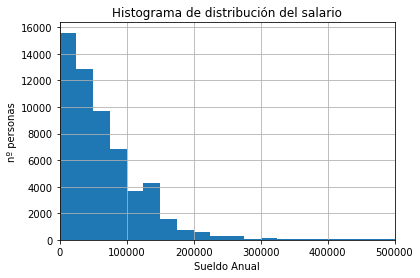

In [224]:
sueldo = datos2021['SueldoAnual']

def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins


bins = compute_histogram_bins(sueldo, 25000.0)
histograma_sueldo = sueldo.hist(bins=bins)
plt.title("Histograma de distribución del salario")
plt.xlim(xmin=0, xmax = 500000)
plt.xlabel('Sueldo Anual')
plt.ylabel('nº personas')
plt.show()

#Los bins del histograma van en intervalos de 25k

In [225]:
print(f"Media:     {round(sueldo.dropna().mean(), 2)}")
print(f"Mediana:   {round(sueldo.dropna().median(), 2)}")
print(f"Asimetría:    {round(sueldo.dropna().skew(), 2)}")

Media:     99815.45
Mediana:   51887.0
Asimetría:    36.05


El valor medio del sueldo es de unos 100.000 euros. La distribución tiene una fuerte asimetría positiva, lo que nos indica que hay una larga cola de valores extremos a la derecha de la media; y la mediana es muy inferior a la media. En distribuciones de este tipo, la mediana puede ser un estadístico más útil que la media si tuviéramos que aproximar el sueldo de un individuo típico, ya que hay valores extremos que distorsionan la media. Por este motivo, vamos a utilizar la mediana de los sueldos en lugar de la media siempre que nos sea posible.

In [226]:
for cantidad in [300000, 1000000]:
    print(f"{len(datos2021[datos2021['SueldoAnual'] > cantidad])} encuestados cobran más de {cantidad} dólares anuales.")

1589 encuestados cobran más de 300000 dólares anuales.
548 encuestados cobran más de 1000000 dólares anuales.


Observamos que el número de valores extremos es muy elevado: más de 1500 encuestados cobran más de 300.000 dólares al año, y unos 500 cobran más de un millón.

En principio, no tenemos motivos para sospechar que estos valores extremos sean falsos: los salarios de los desarrolladores con experiencia y que dominan tecnologías en demanda pueden llegar a ser muy altos. En la página web [levels.fyi](attachment:./levels.fyi), que compara los salarios en las grandes empresas tecnológicas, podemos observar que los sueldos medios para desarrolladores sénior en una empresa FAANG están entre los 200.000 y 350.000 dólares. Los salarios continúan aumentando a medida que se asciende en el organigrama de la empresa, hasta acercarse al millón de dólares o superarlo en algunos casos.

Sin embargo, al tratarse de una encuesta pública, es posible que haya respuestas falsas. Vamos a observar los mayores sueldos.

In [227]:
datos2021.sort_values(by='SueldoAnual', ascending=False)

,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,SueldoAnual,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,Sexo,NivelEducacionNum,TamañoEmpresaNum,AñosProgNum
47697,I prefer not to say,Belgium,Primary/elementary school,21,"Just me - I am a freelancer, sole proprietor, ...",45241312.0,APL,AWS,Couchbase,Other (please specify):,No contesta,1.0,1,21
46656,Employed full-time,Afghanistan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,500 to 999 employees,30468516.0,Bash/Shell;C++;Elixir;LISP;Node.js;Ruby;Rust;S...,AWS;IBM Cloud or Watson,Couchbase;Elasticsearch;MariaDB,Linux-based,"Man;Non-binary, genderqueer, or gender non-con...",4.5,750,3
29107,Employed full-time,United States of America,Some college/university study without earning ...,13,"10,000 or more employees",21822250.0,Bash/Shell;HTML/CSS;Java;JavaScript;Node.js;Py...,Microsoft Azure,MariaDB;MySQL;SQLite,MacOS,Man,2.5,10000,13
20953,Employed full-time,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,100 to 499 employees,20000000.0,C#;C++;Groovy;HTML/CSS;Java;JavaScript;Node.js...,AWS;DigitalOcean;Heroku,Microsoft SQL Server;MySQL;Oracle;PostgreSQL;S...,MacOS,Man,4.0,300,9
9059,Employed full-time,India,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,100 to 499 employees,19200000.0,JavaScript,AWS;Heroku,MongoDB;MySQL;PostgreSQL,Windows,Man,4.5,300,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42476,Employed full-time,Taiwan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,100 to 499 employees,3.0,HTML/CSS;JavaScript;Node.js;PowerShell;TypeScript,DigitalOcean;Microsoft Azure,Elasticsearch;Firebase;MongoDB;MySQL;Redis,MacOS,Man,4.5,300,3
10955,Employed full-time,China,Primary/elementary school,1,2 to 9 employees,2.0,Objective-C,Microsoft Azure,MySQL,MacOS,Woman,1.0,5,1
40743,Employed full-time,Taiwan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,100 to 499 employees,2.0,HTML/CSS;JavaScript;Node.js;Python;SQL,Ninguno,MySQL;PostgreSQL;SQLite,Windows,Woman,4.5,300,2
17553,"Independent contractor, freelancer, or self-em...",United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,2 to 9 employees,1.0,Python;SQL,AWS,PostgreSQL;Redis,MacOS,Man,4.0,5,9


Los sueldos son excepcionalmente altos, pero no llegan a ser totalmente inverosímiles. Sin embargo, los dos primeros valores resultan sospechosos; en el primer caso vemos que todas sus respuestas (APL, AWS, Couchbase, educación primaria, empresa de tamaño 1) se corresponden con la primera opción que se muestra en la encuesta, lo que nos indica que ha ido seleccionando la primera opción disponible para cada pregunta sin intención de contestar con veracidad. En cuanto al segundo desarrollador, parece improbable que un programador pueda llegar a cobrar más de 30 millones de dólares mientras reside en un país devastado como Afganistán, y al contrastar con el dataset original observamos que ha declarado tener un sueldo de 5123467800 en moneda afgana, un valor que ha introducido pulsando sobre números consecutivos en el teclado. Procedemos a eliminar estas dos filas.

En cuanto al resto de los encuestados, no encontramos nada en sus respuestas a las otras preguntas que nos permita confirmar que son inventadas, y en caso de duda preferimos conservarlas.

In [228]:
datos2021.drop(datos2021[datos2021['SueldoAnual'] > 30e6].index, inplace=True)

## Distribución por países

Vamos a estudiar en más detalle los países de procedencia de los encuestados. Lo primero será ver que países son los más populares para ver si encontramos alguna incongruencia o dato que nos llame la atención.

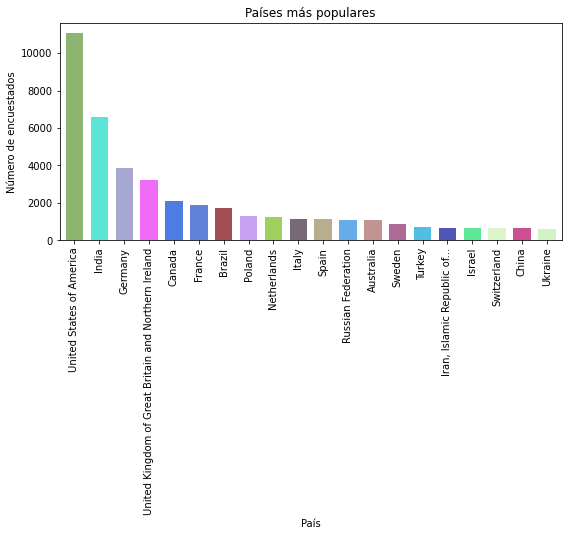

In [229]:
countryData2021 = datos2021["Pais"]
country2021 = countryData2021.dropna().value_counts().head(20)
country2021.plot(kind = 'bar', 
                 title= 'Países más populares',
                 alpha = 0.7,
                 width = 0.7,
                 figsize=(9,4),
                 color = np.random.rand(len(country2021),3))
plt.xlabel('País')
plt.ylabel('Número de encuestados')
plt.show()

Almacenamos esta información en una variable para usarla posteriormente:

In [230]:
paisesPopulares = country2021.index

Para ver una mejor representación de dónde provienen las encuestas hemos decido enseñarlo en un mapa interactivo. Para crear la representación gráfica necesitamos extraer los datos del dataframe.

In [231]:
!pip install openpyxl

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [232]:
import openpyxl
paises2021 = countryData2021.dropna().value_counts()
paises2021.to_excel("excel_paises.xlsx")

El siguiente enlace lleva a la página donde está el mapa interactivo:

https://infogram.com/world-map-1h7j4dvn5emg94n?live

Insertamos a continuación una captura de la imagen estática. Hemos seleccionado una escala de colores entre los valores 0 y 2500 para visualizar mejor las diferencias entre países, ya que la gran mayoría de los datos se encuentran incluidos en este rango.

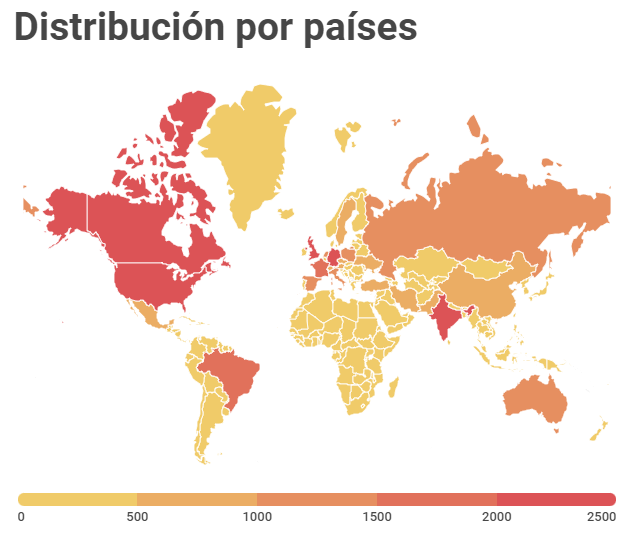

In [233]:
import IPython
IPython.display.Image("images/paises.PNG")
# Debido al gran número de usuarios de EEUU la escala de colores va de 0 a 2500 para una mayor diferenciación

Observamos que el uso de la web es más frecuente en Norteamérica y Europa, con especial predominancia en los países de habla inglesa. También cuenta con un número considerable de usuarios procedentes de Europa, la India, Canadá y Sudamérica. Su uso en América del Sur es más limitado, posiblemente debido a la existencia de una barrera idiomática; únicamente encontramos más de 1.000 encuestados en Brasil. Apenas existen usuarios en el continente africano.

El número de usuarios está relacionado con el tamaño y la población del país, con la notable excepción de China; esto se debe a la barrera de lenguaje y a que el gobierno chino frecuentemente bloquea el acceso a la web. En China existe una alternativa orientada al mercado nativo, SegmentFault.

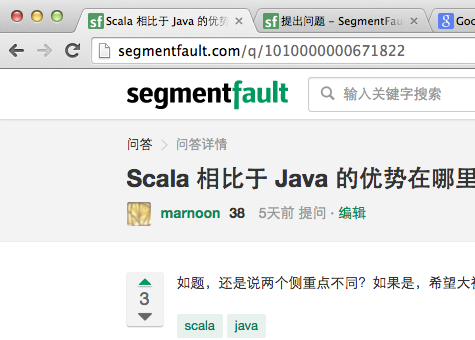

In [234]:
IPython.display.Image("images/segmentfault.png")

Para finalizar esta sección vamos a estudiar las diferencias en el salario de los desarrolladores en función de su país de residencia. Utilizamos la mediana en lugar de la media para minimizar la influencia de los valores extremos, y obtener información más ajustada a la situación de un programador medio.

In [235]:
sueldoMedianaPais = datos2021.groupby(['Pais'])['SueldoAnual'].median()
sueldoMedianaPais

La siguiente gráfica muestra la mediana de los sueldos de los programadores en los veinte países en los que StackOverflow es más popular.

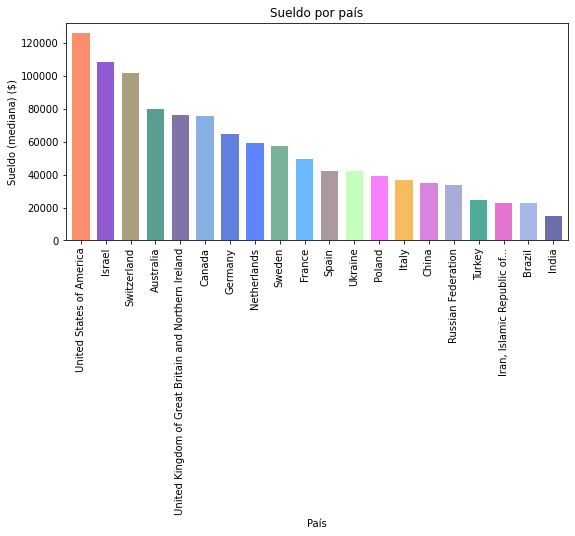

In [236]:
datosPaisesPopulares = datos2021[datos2021['Pais'].isin(list(paisesPopulares))]
sueldo = datosPaisesPopulares.groupby(['Pais'])['SueldoAnual'].median().sort_values(ascending=False).head(20)

sueldo.plot(kind = 'bar', 
                 title= 'Sueldo por país',
                 alpha = 0.7,
                 width = 0.7,
                 figsize=(9,4),
                 color = np.random.rand(len(country2021),3))
plt.xlabel('País')
plt.ylabel('Sueldo (mediana) ($)')
plt.show()

Podemos observar que existe una fuerte correlación entre el sueldo y el nivel económico del país correspondiente. En el apartado 3, dedicado específicamente a los factores que afectan al sueldo, estudiaremos con más detalle la relación entre el salario de un programador y el salario medio en su país.

## Distribución por sexo 

Lo siguiente que vamos a hacer es analizar el género de los encuestados para ver si con el paso de los años ha habido avances en la igualdad.

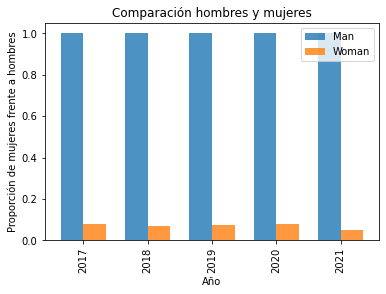

In [237]:
# Lo primero que tenemos que hacer es seleccionar sólo los datos que representan a los hombres y mujeres, esto se debe a que la
# encuesta originalmente tiene como opciones más géneros pero la población de estos es demasiado baja para estudiarla

genderData2021=datos2021[(datos2021['Sexo']=='Man')|(datos2021['Sexo']=='Woman')]
gender2021= genderData2021['Sexo']
genderData2020=datos2020[(datos2020['Sexo']=='Man')|(datos2020['Sexo']=='Woman')]
gender2020= genderData2020['Sexo']
genderData2019=datos2019[(datos2019['Sexo']=='Man')|(datos2019['Sexo']=='Woman')]
gender2019= genderData2019['Sexo']
genderData2018=datos2018[(datos2018['Sexo']=='Man')|(datos2018['Sexo']=='Woman')]
gender2018= genderData2018['Sexo']
genderData2017=datos2017[(datos2017['Sexo']=='Man')|(datos2017['Sexo']=='Woman')]
gender2017= genderData2017['Sexo']

# Contamos el número de encuestados de cada género, normalizamos el número de mujeres frente a los hombres
# para ver cómo ha ido evolucionando durante los años y modificamos los df
g2021 = gender2021.value_counts()
g2021 = g2021 /g2021.abs().max()
g2021c = pd.DataFrame(data=g2021)
g2021T = g2021c.T
g2021T = g2021T.rename(index={'Gender': '2021'})
g2020 = gender2020.value_counts()
g2020 = g2020 /g2020.abs().max()
g2020c = pd.DataFrame(data=g2020)
g2020T = g2020c.T
g2020T = g2020T.rename(index={'Gender': '2020'})
g2019 = gender2019.value_counts()
g2019 = g2019 /g2019.abs().max()
g2019c = pd.DataFrame(data=g2019)
g2019T = g2019c.T
g2019T = g2019T.rename(index={'Gender': '2019'})
g2018 = gender2018.value_counts()
g2018 = g2018 /g2018.abs().max()
g2018c = pd.DataFrame(data=g2018)
g2018T = g2018c.T
g2018T = g2018T.rename(index={'Gender': '2018'})
g2017 = gender2017.value_counts()
g2017 = g2017 /g2017.abs().max()
g2017c = pd.DataFrame(data=g2017)
g2017T = g2017c.T
g2017T = g2017T.rename(index={'Gender': '2017'})
#Concatenamos y hacemos el gráfico
gender = [g2017T,g2018T,g2019T,g2020T,g2021T]
genderF = pd.concat(gender)
genderF.index = ['2017', '2018', '2019', '2020', '2021']
genderF.plot(kind = 'bar',title= 'Comparación hombres y mujeres',alpha=0.8,width = 0.7)
plt.xlabel('Año')
plt.ylabel('Proporción de mujeres frente a hombres')
plt.show()


Es este diagrama de barras podemos observar que la población de encuestados masculinos es mucho mayor todos los años a la del femenino. Cuando planteamos este apartado lo que esperábamos encontrar era algún tipo de cambio debido a los movimientos que buscan la igualdad en estos últimos años. No solo eso, sino que si nos fijamos más de cerca podemos ver que en este último año el número de mujeres respecto al de hombres es el más bajo de estos últimos 5 años. Esto es preocupante porque si lo que buscamos es la igualdad no estamos tomando las medidas necesarias para llegar a esta.

## Nivel de estudios

En este apartado analizamos el nivel de estudios para saber qué tipo de formación tienen los encuestados. 

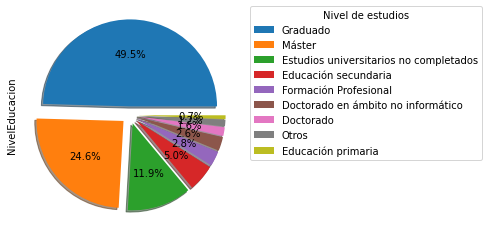

In [238]:
edlevel2021 = datos2021["NivelEducacion"]
edlevel2021= edlevel2021.replace({
           "Primary/elementary school":"Educación primaria",
           "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Educación secundaria",
           "Some college/university study without earning a degree":"Estudios universitarios no completados",
           "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":"Graduado",
           "Associate degree (A.A., A.S., etc.)":"Formación Profesional",
           "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":"Máster",
           "Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctorado en ámbito no informático",
           "Professional degree (JD, MD, etc.)":"Doctorado",
           "Something else":"Otros"})
edlevelCount = edlevel2021.dropna().value_counts()
volar = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
edlevelCount.plot(kind = 'pie',
                  explode = volar,
                  autopct='%1.1f%%',
                  fontsize= 10,
                  shadow = True,
                  startangle=0,
                  labels = None
                  )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=edlevelCount.index, 
           title ='Nivel de estudios')
plt.show()

Observamos que en conjunto la población de programadores profesionales tiene un nivel educativo elevado. Aproximadamente el 80% de los encuestados cuentan con al menos un graduado universitario: un 50% decidió no realizar más estudios, y un 30% los continuó hasta alcanzar un máster o doctorado. Por otro lado, un 12% de programadores en activo dejó su carrera universitaria.

## Comparación de sueldo por género

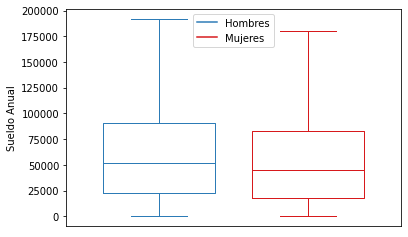

In [239]:
data_a = [datos2021['SueldoAnual'][(datos2021['Sexo']=='Man')]]
data_b = [datos2021['SueldoAnual'][(datos2021['Sexo']=='Woman')]]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

man = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
woman = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(man, '#2C7BB6') 
set_box_color(woman, '#D7191C')

plt.plot([], c='#2C7BB6', label='Hombres')
plt.plot([], c='#D7191C', label='Mujeres')
plt.xticks([])
plt.ylabel('Sueldo Anual')
plt.legend()
plt.show()

In [240]:
sueldoH = data_a[0].median()
sueldoM = data_b[0].median()
print(f'La mediana del sueldo es {sueldoH:.0f}$ en hombres y {sueldoM:.0f}$ para las mujeres, un {(sueldoH/sueldoM-1)*100:.2f}% más bajo.')

La mediana del sueldo es 51706$ en hombres y 45379$ para las mujeres, un 13.94% más bajo.


Para hacer una mejor comparación de los boxplots del sueldo de los hombres y las mujeres hemos limitado la gráfica al rango de salarios inferiores a 200.000 dólares, ya que los valores extremos dificultaban mucho una correcta visualización. Vemos que el sueldo de las mujeres es considerablemente más bajo, lo que, unido a la gran diferencia en el número de programadores de género masculino y femenino, nos indica que todavía queda mucho trabajo por recorrer hasta llegar a la igualdad.

<h1 style = "color:#009900">Apartado 3: Estudio del mercado laboral</h1>

Nuestro objetivo en este apartado es analizar las características y tendencias del mercado laboral, especialmente en los ámbitos más relacionados con nuestro grado, como son el manejo de grandes cantidades de datos y el uso de servicios en la nube. A continuación nos centraremos en el estudio del sueldo y las variables que influyen en él.

Comenzamos analizando la evolución en el uso de las tecnologías en la nube.

## Uso de nubes

En primer lugar obtenemos las estadísticas de uso de los grandes servicios de computación en la nube en el año 2021.

In [241]:
cloudData2021 = datos2021["NubeUsada"]

resultados_2021 = {}

plataformas = ["AWS", "Azure", "Google Cloud Platform", "IBM Cloud"]

for plataforma in plataformas:
    resultados_2021[plataforma] = cloudData2021.str.contains(plataforma).sum() / cloudData2021.size

# Como hay desarrolladores que usan varias plataformas, no podemos sumar 
# los porcentajes para hallar el porcentaje total
regex_nubes = '|'.join(plataformas)
resultados_2021["total"] = cloudData2021.str.contains(regex_nubes).mean()

print(f"Un {resultados_2021['total']*100:.2f}% de los encuestados utilizan servicios en la nube.")

Un 62.43% de los encuestados utilizan servicios en la nube.


Más de un 60% de los programadores en activo ya han utilizado al menos uno de estos servicios durante el año anterior, de forma que son tecnologías que experimentan una gran demanda. Vamos a estudiar también la evolución en el tiempo del uso de estas plataformas para comprobar que, como creemos, el campo está en fuerte crecimiento. Para ello realizamos la misma búsqueda en los datasets correspondientes a años anteriores. 

In [242]:
cloudData2017 = datos2017["NubeUsada"]

resultados_2017 = {}

for plataforma in plataformas:

# Como hay desarrolladores que usan varias plataformas a la vez,
# usamos str.contains en vez de ==
    resultados_2017[plataforma] = cloudData2017.str.contains(plataforma).sum() / cloudData2017.size

resultados_2017["total"] = cloudData2017.str.contains(regex_nubes).mean()

resultados_2017

{'AWS': 0.195704519664554,
 'Azure': 0.08001439207328886,
 'Google Cloud Platform': 0.0,
 'IBM Cloud': 0.0,
 'total': 0.2514184495308738}

In [243]:
cloudData2018 = datos2018["NubeUsada"]

resultados_2018 = {}
# Contar los encuestados que nunca han usado ninguna nube
for plataforma in ["AWS", "Azure", "Google Cloud Platform", "IBM Cloud"]:

# Como hay desarrolladores que usan varias plataformas a la vez,
# usamos str.contains en vez de ==
    resultados_2018[plataforma] = cloudData2018.str.contains(plataforma).sum() / cloudData2018.size

resultados_2018["total"] = cloudData2018.str.contains(regex_nubes).mean()

resultados_2018

{'AWS': 0.1835733030711398,
 'Azure': 0.08295623803106603,
 'Google Cloud Platform': 0.0556067806227392,
 'IBM Cloud': 0.009844669834740052,
 'total': 0.2710546847294134}

In [244]:
cloudData2019 = datos2019["NubeUsada"]

resultados_2019 = {}
# Contar los encuestados que nunca han usado ninguna nube
for plataforma in ["AWS", "Azure", "Google Cloud Platform", "IBM Cloud"]:

# Como hay desarrolladores que usan varias plataformas a la vez,
# usamos str.contains en vez de ==
    resultados_2019[plataforma] = cloudData2019.str.contains(plataforma).sum() / cloudData2019.size

resultados_2019["total"] = cloudData2019.str.contains(regex_nubes).mean()

resultados_2019

{'AWS': 0.2789476088247385,
 'Azure': 0.12262671477945766,
 'Google Cloud Platform': 0.11850058618432072,
 'IBM Cloud': 0.016489288813776093,
 'total': 0.4184899282875805}

In [245]:
cloudData2020 = datos2020["NubeUsada"]

resultados_2020 = {}
# Contar los encuestados que nunca han usado ninguna nube
for plataforma in ["AWS", "Azure", "Google Cloud Platform", "IBM Cloud"]:

# Como hay desarrolladores que usan varias plataformas a la vez,
# usamos str.contains en vez de ==
    resultados_2020[plataforma] = cloudData2020.str.contains(plataforma).sum() / cloudData2020.size

resultados_2020["total"] = cloudData2020.str.contains(regex_nubes).mean()

resultados_2020

{'AWS': 0.25965715254380944,
 'Azure': 0.1384527366346704,
 'Google Cloud Platform': 0.1234928908948361,
 'IBM Cloud': 0.012226389506918399,
 'total': 0.4091072828597461}

Hemos recopilado los resultados en una visualización que muestra la evolución del uso de la nube con el tiempo. Está disponible en el siguiente enlace:

https://public.flourish.studio/visualisation/8384467/

<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/8384467"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

En 2017 menos de un 30% de los programadores usaban plataformas en la nube, pero la adopción de estas tecnologías en los últimos cinco años ha sido excepcionalmente rápida. 

El principal jugador en este mercado es Amazon Web Services, cuyos servicios más destacados son almacenamiento (Simple Storage Service) y computación (Elastic Cloud Compute). De acuerdo con [un estudio de Kinsta](https://kinsta.com/aws-market-share/), nueve millones de sitios web, un 6% del total, están almacenados en AWS. El segundo puesto corresponde al servicio de Microsoft, Azure. 

Google Cloud apenas era utilizada en 2017, pero ha irrumpido con fuerza en la escena gracias a su facilidad de uso y su fácil integración con otros servicios de Google, y en la actualidad compite con Azure por la segunda posición. Por último, el uso de IBM es testimonial, en torno al 1-2% dentro del periodo analizado. Su servicio más destacado es IBM Watson, un conjunto de herramientas de IA orientadas a la empresa con un avanzado sistema de procesamiento del lenguaje natural.

Hay también una ausencia notable: Alibaba Cloud. Buena parte de su documentación sólo está disponible en idioma chino y su oferta de servicios y precios es poco competitiva, lo que hace que su uso esté prácticamente limitado a empresas que operan en China y están obligadas a mantener sus datos dentro del país. Como hemos visto, los desarrolladores de origen chino están infrarrepresentados en la encuesta de StackOverflow al preferir usar plataformas propias, lo que explica la ausencia de Alibaba Cloud en nuestros datos.

## API

Hemos accedido a la API de Twitter para comprobar si la popularidad de estas plataformas se ve reflejada en el discurso en redes sociales. El notebook está disponible en [este enlace](https://datalore.jetbrains.com/view/notebook/MRknIQniBMrTei2ukiEFWz). 

El número de menciones en Twitter a cada plataforma en el último día es:

* Amazon AWS: 8414
* Google Cloud Platform: 6735
* MS Azure: 6684
* IBM Cloud: 257

https://public.flourish.studio/visualisation/8475984/


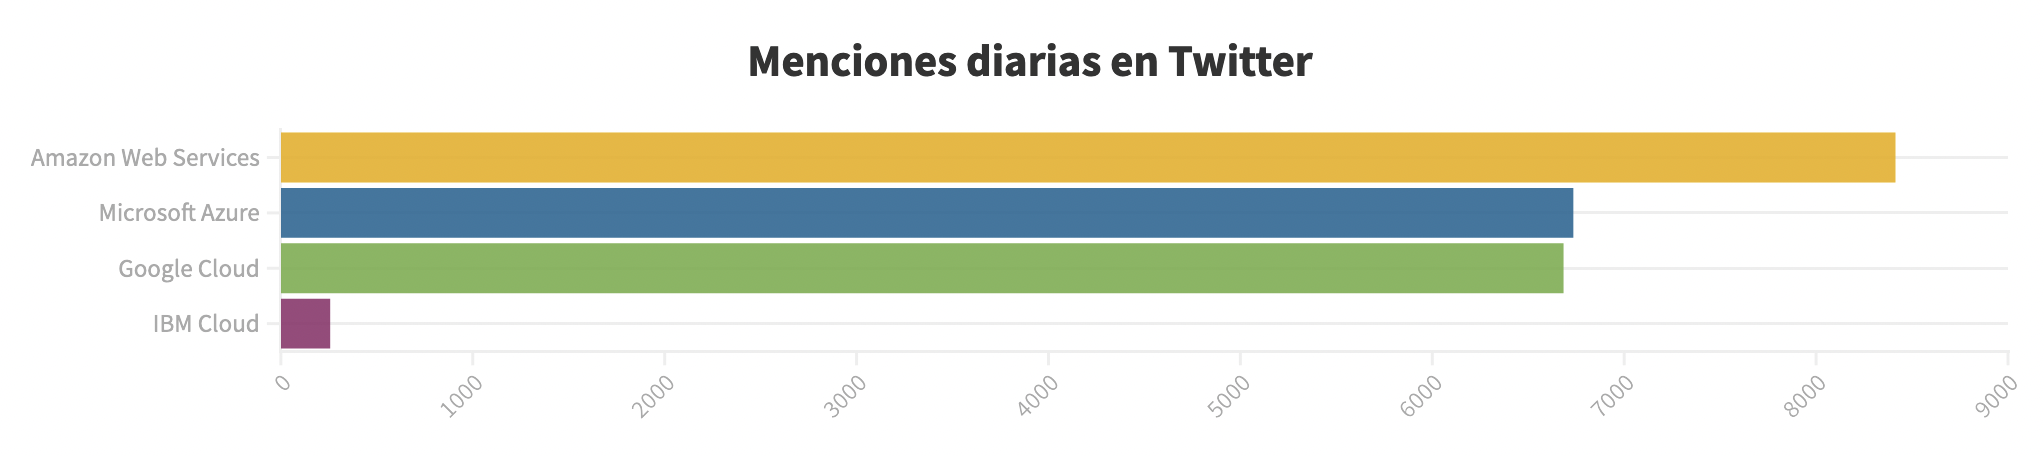

In [246]:
IPython.display.Image("images/twitter.png")

Comprobamos que estos números concuerdan con los porcentajes de uso de la nube que hemos obtenido anteriormente, con Amazon en cabeza, Microsoft y Google disputándose la segunda posición y una presencia anecdótica de la nube de IBM. 

Las tres grandes plataformas generan en conjunto unos 20.000 tweets diarios, lo que nos confirma que se trata de un campo con una actividad continua.

### Lenguajes utilizados

Nuestro objetivo en este apartado es determinar cuáles son los lenguajes de programación con más aceptación en el mercado actual, y tratar de encontrar correlaciones entre su uso y el sueldo.

La encuesta incluye una pregunta relativa a los lenguajes utilizados, pero está en un formato que hace difícil su uso, ya que todos los lenguajes se hallan concatenados en un string. El primer paso es crear una nueva columna booleana en el DataFrame para cada uno de los lenguajes.

In [247]:
# Lista de lenguajes (obtenida del enunciado de la encuesta)
lenguajes = ['APL', 'Assembly', 'Bash/Shell', 'C', 'C#', 'C++', 'Clojure', 'COBOL', 'Crystal', 'Dart', 
             'Delphi', 'Elixir', 'Erlang', 'F#', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 
             'Julia', 'Kotlin', 'LISP', 'Matlab', 'Node.js', 'Objective-C', 'Perl', 'PHP', 'PowerShell', 
             'Python', 'R', 'Ruby', 'Rust', 'Scala', 'SQL', 'Swift', 'TypeScript', 'VBA']

In [248]:
# Solución obtenida de https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns/34026984#34026984
for lenguaje in lenguajes:
    datos2021[lenguaje] = datos2021.apply(lambda row: lenguaje in row['LenguajesUsados'], axis=1)

In [249]:
datos2021['Python'].values.sum()

24055

A continuación creamos un DataFrame con la información que nos interesa analizar: el número de usuarios de cada lenguaje, y la mediana de su sueldo.

In [250]:
dfLenguajes = pd.DataFrame(data= {'Lenguaje': lenguajes,
                                  'Usuarios': [datos2021[lenguaje].values.sum() for lenguaje in lenguajes],
                                  'SueldoAnual': [datos2021[datos2021[lenguaje]]['SueldoAnual'].median() for lenguaje in lenguajes]})

In [251]:
dfLenguajes.head()

,Lenguaje,Usuarios,SueldoAnual
0,APL,269,42000.0
1,Assembly,2355,56481.0
2,Bash/Shell,16007,68102.0
3,C,44659,51888.0
4,C#,17268,55776.0


In [252]:
dfLenguajes.sort_values(by='Usuarios', ascending=False)

,Lenguaje,Usuarios,SueldoAnual
18,Java,45512,49725.0
3,C,44659,51888.0
19,JavaScript,39749,49725.0
17,HTML/CSS,32380,49725.0
34,SQL,29384,51888.0
29,Python,24055,55000.0
36,TypeScript,21096,54986.0
24,Node.js,20964,51300.0
4,C#,17268,55776.0
2,Bash/Shell,16007,68102.0


Los lenguajes más utilizados son Java, C, JavaScript, HTML/CSS y SQL, todos ellos lenguajes establecidos y fiables con décadas de historia. A pesar de su gran crecimiento en los últimos años, Python sólo alcanza la sexta posición. Sin embargo es posible que Python esté infrarrepresentado en nuestra encuesta, ya que es muy utilizado en ámbitos como la física y la biotecnología, pero los profesionales de estos campos probablemente no participen en una encuesta dedicada a programadores a tiempo completo.

A continuación buscamos los lenguajes que ofrecen mejores sueldos.

In [253]:
dfLenguajes.sort_values(by='SueldoAnual', ascending=False)

,Lenguaje,Usuarios,SueldoAnual
6,Clojure,1303,85433.0
26,Perl,1404,76263.0
13,F#,612,75669.0
31,Ruby,4571,75631.0
32,Rust,3705,75527.0
11,Elixir,1207,75000.0
12,Erlang,502,72846.0
33,Scala,1775,71340.0
22,LISP,648,70139.5
30,R,9468,69700.0


La lista está dominada por lenguajes de programación funcional, como son Clojure, Lisp, F# y Elixir/Erlang, o bien lenguajes multiparadigma con una fuerte orientación funcional como Scala, Perl y Ruby. La principal excepción es Rust, un lenguaje que busca cubrir el nicho de uso de C y C++. 

Por otro lado, ninguno de los diez lenguajes más populares aparecen también en esta lista.

Para analizar de forma gráfica esta posible relación entre la popularidad de un lenguaje y el salario al que da acceso hemos utilizado un diagrama de dispersión. Gracias a la librería Plotly, al situar el ratón sobre cada uno de los puntos aparece un desplegable con el nombre del lenguaje.

In [254]:
!pip install plotly

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [255]:
import plotly.express as px
fig = px.scatter(dfLenguajes, x="Usuarios", y="SueldoAnual", hover_data=['Lenguaje'])
fig.show()

Dentro del grupo de los lenguajes con más de veinte mil usuarios encuestados, incluido Python, no existen grandes variaciones en el sueldo, cuya mediana está en torno a los 50.000 dólares. Dada la gran popularidad de estos lenguajes, es de esperar que la mediana del sueldo sea aproximadamente la mediana del conjunto de los encuestados.

Dentro de los lenguajes menos populares sí podemos encontrar diferencias significativas. Como comentamos en el apartado anterior, lenguajes con una orientación más funcional como Clojure, F# y Erlang / Elixir ofrecen sueldos considerablemente superiores a la mediana. Podemos encontrar también lenguajes que están mucho peor pagados, como Dart y PHP.

## Análisis de competitividad de los sueldos

Con el objetivo de estudiar si la programación es competitiva económicamente, vamos a comparar los salarios de los trabajadores con los sueldos medios en cada país.

Hemos obtenido los sueldos medios haciendo scraping en la web [Numbeo](https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=105). El código del scraper está disponible en [este notebook](https://datalore.jetbrains.com/view/notebook/1oGxhlpHIqaRiFi5a7PmfO).

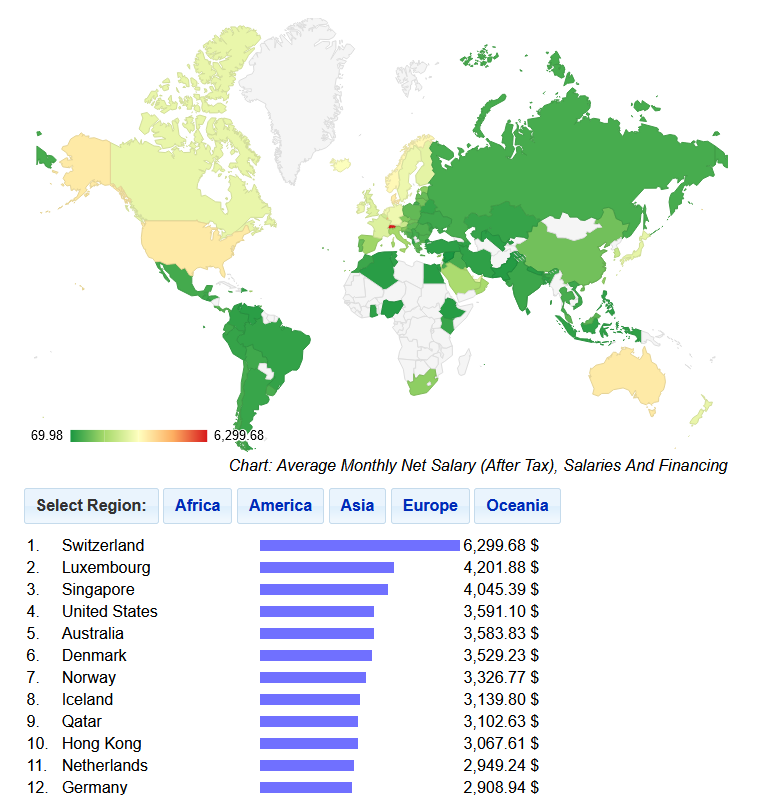

In [256]:
IPython.display.Image("images/numbeo.png")

En primer lugar cargamos los datos obtenidos:

In [257]:
prueba = pd.read_csv('sueldos.csv', sep=',')

prueba['datos_sueldo'] = prueba['datos_sueldo'].str.replace(',', '').astype(float)

print(prueba)

     Unnamed: 0     datos_pais  datos_sueldo
0             0    Switzerland       6221.54
1             1     Luxembourg       4224.22
2             2      Singapore       4004.48
3             3      Australia       3639.57
4             4  United States       3592.23
..          ...            ...           ...
105         105          Nepal        221.89
106         106       Pakistan        200.50
107         107       Ethiopia        199.51
108         108        Nigeria        182.70
109         109          Syria         73.12

[110 rows x 3 columns]


Algunos de los países tienen nombres diferentes en los dos datasets.

In [258]:
paises_con_otro_nombre = pd.merge(datos2021, prueba, how='left', right_on='datos_pais', left_on='Pais', indicator=True)
paises_con_otro_nombre2 = paises_con_otro_nombre[paises_con_otro_nombre['_merge']=='left_only']
print(paises_con_otro_nombre2['Pais'].value_counts())

prueba = prueba.replace('United States', 'United States of America').replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland').replace('Russia', 'Russian Federation').replace('Vietnam', 'Viet Nam').replace('Hong Kong (S.A.R.)', 'Hong Kong')

United States of America                                11053
United Kingdom of Great Britain and Northern Ireland     3246
Russian Federation                                       1110
Iran, Islamic Republic of...                              686
Viet Nam                                                  235
                                                        ...  
Saint Kitts and Nevis                                       1
San Marino                                                  1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
North Korea                                                 1
Name: Pais, Length: 76, dtype: int64


In [259]:
dfsueldos = pd.merge(datos2021, prueba, how='left', right_on='datos_pais', left_on='Pais')
dfsueldos_resumido = dfsueldos[['Pais','SueldoAnual','datos_sueldo']].dropna()
dfsueldos_resumido['proporcion'] = dfsueldos_resumido['SueldoAnual'] / (dfsueldos_resumido['datos_sueldo'] * 12)
dfsueldos_resumido

,Pais,SueldoAnual,datos_sueldo,proporcion
0,Slovakia,62268.0,998.70,5.195754
1,Austria,56481.0,2253.62,2.088529
2,United Kingdom of Great Britain and Northern I...,76263.0,2646.71,2.401189
3,India,14939.0,451.41,2.757840
4,Sweden,51552.0,2862.29,1.500896
...,...,...,...,...
58145,Brazil,18326.0,348.76,4.378847
58146,United States of America,160500.0,3592.23,3.723314
58148,United States of America,90000.0,3592.23,2.087840
58149,Canada,816816.0,2818.27,24.152406


In [260]:
print(f"Media global: {round(dfsueldos_resumido['proporcion'].mean(), 2)}")

Media global: 4.68


In [261]:
dfsueldos_resumido_por_pais = dfsueldos_resumido.groupby("Pais")
dfsueldos_resumido_por_pais.median('proporcion').round(2)

,SueldoAnual,datos_sueldo,proporcion
Pais,,,
Albania,18546.0,330.86,4.67
Algeria,9875.0,241.89,3.40
Argentina,36000.0,408.51,7.34
Armenia,28590.5,402.68,5.92
Australia,80172.0,3639.57,1.84
...,...,...,...
United States of America,126000.0,3592.23,2.92
Uruguay,42000.0,619.03,5.65
Uzbekistan,16800.0,247.91,5.65


Comprobamos que la media de los sueldos de los profesionales que han respondido a la encuesta son muy superiores a los sueldos medios en sus respectivos países. La diferencia es especialmente pronunciada en los países con peores condiciones económicas; la programación es una actividad que se presta a la colaboración entre países y el trabajo remoto, y buena parte de estos programadores tienen la posibilidad de trabajar en una empresa situada en un país con mejor economía, lo que les permite acceder a sueldos muy superiores a los habituales en su país de residencia.

En España, el sueldo medio de un programador es aproximadamente cuatro veces superior al sueldo medio.

## Correlaciones para el sueldo

Nuestro dataset contiene mayoritariamente columnas con valores categóricos. Para poder analizar matemáticamente la correlación debemos utilizar las conversiones a valores numéricos que efectuamos en la fase de limpieza de datos.

In [262]:
# Hacemos una copia para estudiar correlaciones, con sólo columnas numéricas
df_corr = datos2021[['SueldoAnual', 'AñosProgNum', 'NivelEducacionNum', 'TamañoEmpresaNum']]

In [263]:
corr_plot = df_corr.corr()
corr_plot.style.background_gradient(cmap='coolwarm').format(precision=2)

,SueldoAnual,AñosProgNum,NivelEducacionNum,TamañoEmpresaNum
SueldoAnual,1.00,0.07,0.02,0.05
AñosProgNum,0.07,1.00,0.03,0.05
NivelEducacionNum,0.02,0.03,1.00,0.11
TamañoEmpresaNum,0.05,0.05,0.11,1.00


Las correlaciones son positivas pero muy pequeñas en valor absoluto, lo que nos indica que la relación entre las variables es débil. No existe ninguna variable con una elevada influencia en el sueldo, sino que depende de una combinación de factores, algunos de los cuales no están representados en el gráfico superior por no ser variables numéricas; en particular, tanto el país como los lenguajes utilizados y, lamentablemente, el género del programador tienen una gran influencia en su sueldo. 

Observamos también que la correlación más fuerte de todas las calculadas en la matriz es una correlación positiva entre el nivel educativo y el tamaño de la empresa, lo que nos indica que las empresas de mayor tamaño prefieren contratar a desarrolladores titulados, mientras que las pequeñas empresas y startups están más dispuestas a contratar a programadores sin título o sin experiencia.

Por último, vamos a analizar si la experiencia con tecnologías en la nube da acceso a salarios mayores.

## Correlación con el uso de la nube

Creamos una nueva columna cuyo valor es `True` si el desarrollador ha utilizado plataformas en la nube, y `False` en caso contrario. A continuación agrupamos los datos en función del valor de esta columna y calculamos la mediana.

In [264]:
regex_nubes = '|'.join(["AWS", "Azure", "Google Cloud Platform", "IBM Cloud"])

datos2021["nube"] = datos2021["NubeUsada"].str.contains(regex_nubes)
df_nube = datos2021.groupby("nube")
df_nube.mean()["SueldoAnual"].round(2)

In [265]:
print(f'Proporción: {round( (df_nube.mean()["SueldoAnual"][True] / df_nube.mean()["SueldoAnual"][False] - 1) * 100, 2)}%')

Proporción: 42.0%


Un profesional típico que emplea tecnologías en la nube en su trabajo tienen un sueldo un 45% mayor que uno que no las usa.

La mayoría de las columnas en nuestro conjunto de datos eran categóricas, lo que nos impide calcular el coeficiente de correlación mediante métodos numéricos. Sin embargo, a lo largo de este informe hemos tratado de evaluar su efecto en el sueldo mediante un análisis individualizado. Como conclusión, resumimos a continuación los principales factores que afectan al sueldo de un programador:

* **País**: ya desde el principio de la fase de análisis exploratorio pudimos observar que el país de residencia tiene una enorme influencia en el sueldo. Los países con mayor nivel de vida y potencial económico tienen también salarios más elevados. Los salarios más altos se dan en Estados Unidos e Israel, seguido de cerca por países occidentales con elevada calidad de vida como Suiza, Australia, el Reino Unido, Canadá y Alemania. España ocupa la undécima posición en el ranking.


* **Uso de la nube**: además de contar con una rapidísima adopción, las tecnologías en la nube permiten acceder a salarios de mdia un 45% superiores.


* **Lenguajes utilizados**: los lenguajes de programación más populares dan acceso a salarios similares, con mediana en torno a los 50.000 euros. Sin embargo, hay un grupo de lenguajes menos conocidos, entre ellos Clojure, Scala y F#, cuya alta dificultad y menor popularidad permite que los programadores expertos en ellos puedan obtener sueldos muy superiores 


* **Género**: lamentablemente, la mediana de los sueldos es más de un 10% inferior para las mujeres que para los hombres. Este dato, unido a la gran disparidad de géneros, nos muestra que queda un largo camino por recorrer hasta llegar a la igualdad.


* **Años de experiencia** (R^2 = 0,06): los desarrolladores senior tienen acceso a puestos de mayor responsabilidad y mayor salario que los programadores novatos.


* **Tamaño de la empresa** (R^2 = 0,03): los sueldos son ligeramente superiores en las empresas de mayor tamaño, pero el efecto es muy reducido y difícil de apreciar.


* **Nivel de educación** (R^2 = 0,01): en contra de lo que esperábamos, el efecto de esta variable es casi insignificante. Nuestra explicación consiste en que la programación es un campo no regulado, en el que, al contrario que en disciplinas como la medicina, se permite la incorporación al mercado laboral sin exigir ningún título. Un desarrollador novato recién salido de la universidad cobrará menos que un programador sin título pero con cuatro años de experiencia, aunque a medida que avanza su carrera puede esperar que su educación le abra las puertas a puestos de trabajo de mayor responsabilidad.

<h1 style = "color:#009900">Apartado 4: Información adicional</h1>

El dataset está abierto a todos los programadores, pero no incluye información más detallada sobre su rol: no existe una pregunta que permita seleccionar si es desarrollador web, administrador de sistemas, etcétera. Vamos a asignar roles a cada encuestado, en función de las tecnologías que utiliza. Nuestra asignación va a distar mucho de ser perfecta, dado que existe mucho solapamiento entre los diferentes puestos de trabajo y las competencias correspondientes a cada uno son difíciles de delimitar, pero confiamos en que sea suficiente para obtener información útil.

Es posible que algún programador cumpla a la vez las condiciones para dos o más grupos; esto no representa un problema ya que es frecuente que los desarrolladores tengan que desempeñar varios roles a la vez, especialmente en empresas más pequeñas y menos especializadas.

In [266]:
datos2021.head()

,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,SueldoAnual,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,...,Python,R,Ruby,Rust,Scala,SQL,Swift,TypeScript,VBA,nube
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",3,20 to 99 employees,62268.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Ninguno,PostgreSQL;SQLite,MacOS,...,False,False,False,False,False,False,True,False,False,False
1,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,100 to 499 employees,56481.0,JavaScript;TypeScript,Ninguno,Ninguno,Windows,...,False,False,False,False,False,False,False,True,False,False
2,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Just me - I am a freelancer, sole proprietor, ...",76263.0,Bash/Shell;HTML/CSS;Python;SQL,Ninguno,Elasticsearch;PostgreSQL;Redis,Linux-based,...,True,False,False,False,False,True,False,False,False,False
3,Employed part-time,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"10,000 or more employees",14939.0,HTML/CSS;JavaScript,AWS,PostgreSQL,Windows,...,False,False,False,False,False,False,False,False,False,True
4,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,51552.0,C++;Python,Ninguno,PostgreSQL,Linux-based,...,True,False,False,False,False,False,False,False,False,False


Las tecnologías que hemos elegido como representativas de cada rol son:

* **Frontend**: HTML, CSS, JavaScript
* **Backend**: Node.js ó Elixir ó Go
* **Full stack web developer**: tanto frontend como backend
* **Analista de datos**: Python, Scala ó R ó Matlab, al menos una base de datos
* **Analista de big data**: analista de datos que además usa tecnologías en la nube
* **Sysadmin Unix**: Bash/Shell, sistema operativo contiene Linux-based
* **Programador de sistemas**: Assembly, C ó Rust

In [267]:
datos2021['Frontend'] = datos2021.apply(lambda row: row['HTML/CSS'] and row['JavaScript'], axis=1)
datos2021['Backend'] = datos2021.apply(lambda row: row['Node.js'] or  row['Elixir'] or  row['Go'], axis=1)
datos2021['Full stack web developer'] = datos2021.apply(lambda row: row['Frontend'] and row['Backend'], axis=1)
datos2021['Analista de datos'] = datos2021.apply(lambda row: row['Python'] or  row['Scala'] or  row['R'] or  row['Matlab'], axis=1)
datos2021['Analista de big data'] = datos2021.apply(lambda row: row['Analista de datos'] and row['NubeUsada'] != 'Ninguno', axis=1)
datos2021['Sysadmin Unix'] = datos2021.apply(lambda row: row['Bash/Shell'], axis=1)
datos2021['Programador de sistemas'] = datos2021.apply(lambda row: row['Assembly'] or  row['C'] or  row['Rust'], axis=1)

In [268]:
datos2021.head()

,Empleo,Pais,NivelEducacion,AñosProgramandoProfesionalmente,TamañoEmpresa,SueldoAnual,LenguajesUsados,NubeUsada,BDDUsadas,SistemaOperativo,...,TypeScript,VBA,nube,Frontend,Backend,Full stack web developer,Analista de datos,Analista de big data,Sysadmin Unix,Programador de sistemas
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",3,20 to 99 employees,62268.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Ninguno,PostgreSQL;SQLite,MacOS,...,False,False,False,True,False,False,False,False,False,True
1,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,100 to 499 employees,56481.0,JavaScript;TypeScript,Ninguno,Ninguno,Windows,...,True,False,False,False,False,False,False,False,False,False
2,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Just me - I am a freelancer, sole proprietor, ...",76263.0,Bash/Shell;HTML/CSS;Python;SQL,Ninguno,Elasticsearch;PostgreSQL;Redis,Linux-based,...,False,False,False,False,False,False,True,False,True,True
3,Employed part-time,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"10,000 or more employees",14939.0,HTML/CSS;JavaScript,AWS,PostgreSQL,Windows,...,False,False,True,True,False,False,False,False,False,True
4,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,51552.0,C++;Python,Ninguno,PostgreSQL,Linux-based,...,False,False,False,False,False,False,True,False,False,True


A continuación creamos un DataFrame para contabilizar el número de encuestados en cada rol, y calcular la mediana de su sueldo.

In [269]:
roles = ["Frontend", "Backend", "Full stack web developer", "Analista de datos", "Sysadmin Unix", "Analista de big data",
         "Programador de sistemas"]

dfRoles = pd.DataFrame(data= {'Rol': roles,
                                  'Usuarios': [datos2021[rol].values.sum() for rol in roles],
                                  'SueldoAnual': [datos2021[datos2021[rol]]['SueldoAnual'].median() for rol in roles]})

In [270]:
dfRoles.sort_values(by='SueldoAnual', ascending=False)

,Rol,Usuarios,SueldoAnual
4,Sysadmin Unix,16007,68102.0
5,Analista de big data,21405,60000.0
3,Analista de datos,29125,58368.0
1,Backend,24714,54049.0
6,Programador de sistemas,45507,52692.0
2,Full stack web developer,16876,51887.0
0,Frontend,29666,49725.0


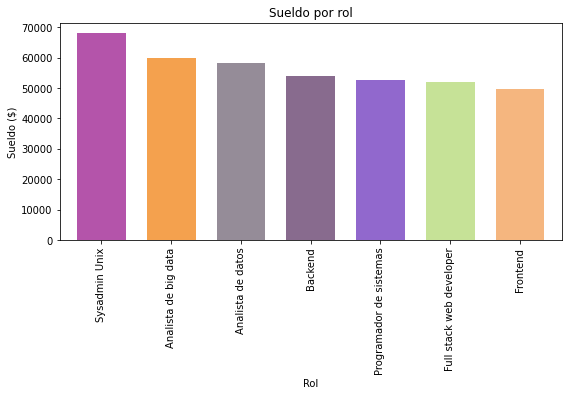

In [271]:
dfRoles2 = dfRoles.groupby(['Rol'])['SueldoAnual'].median().sort_values(ascending=False)

dfRoles2.plot(kind = 'bar', 
                 title= 'Sueldo por rol',
                 alpha = 0.7,
                 width = 0.7,
                 figsize=(9,4),
                 color = np.random.rand(len(country2021),3))
plt.xlabel('Rol')
plt.ylabel('Sueldo ($)')
plt.show()

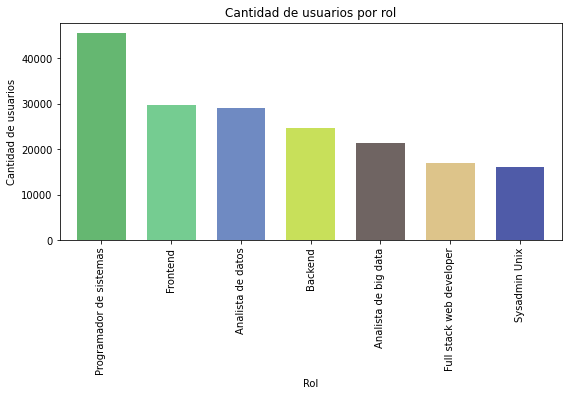

In [272]:
dfRoles3 = dfRoles.groupby(['Rol'])['Usuarios'].median().sort_values(ascending=False)

dfRoles3.plot(kind = 'bar', 
                 title= 'Cantidad de usuarios por rol',
                 alpha = 0.7,
                 width = 0.7,
                 figsize=(9,4),
                 color = np.random.rand(len(country2021),3))
plt.xlabel('Rol')
plt.ylabel('Cantidad de usuarios')
plt.show()

Los administradores de sistemas Linux están en primera posición, dado que se trata de puestos que suelen estar ocupados por desarrolladores senior con años de experiencia y con responsabilidades en la empresa. 

Los analistas de datos ocupan los dos siguientes puestos, con sueldos que superan a la mediana general en casi diez mil dólares anuales. La gran expansión de este área del conocimiento en los últimos años, unida a la falta de analistas que dominen tanto la programación como la estadística y la economía de empresa, ha creado una elevada demanda que se traduce en altos sueldos.

Los desarrolladores web frontend ocupan la última posición, en parte debido a que suelen ser puestos ocupados por programadores con escasa experiencia, recién salidos de la universidad o de un bootcamp. 

Por último, los programadores de sistemas suelen ser en su mayoría graduados universitarios con experiencia, por lo que consideramos que el salario que hemos obtenido es sorprendentemente bajo. Al consultar el DataFrame observamos que más de 45.000 encuestados tienen dicho rol asignado, lo que nos indica que nuestro filtro probablemente es excesivamente laxo.

<h1 style = "color:#009900">Apartado 5: Conclusiones</h1>

En este apartado resumimos los resultados más relevantes de nuestro estudio.

* La programación es una buena opción desde el punto de vista económico. Los desarrolladores tienen de media sueldos cuatro veces superiores al sueldo medio en sus países.
  
* Las principales variables que influyen en el sueldo de un programador son el país de residencia, su dominio de tecnologías en la nube, los lenguajes de programación que utiliza y su género. Factores como los años de experiencia, el tamaño de la empresa y el nivel de educación tienen también una influencia positiva en el sueldo.
  
* La mediana del sueldo cobrado por una programadora mujer es más de un 10% inferior a la del sueldo cobrado por un hombre. 
  
* Los lenguajes de programación más populares son Java, C, HTML/CSS/JS, SQL y Python, y la mediana del sueldo cobrado por sus usuarios está en torno a 50.000 dólares.

* Los lenguajes de programación funcional como Lisp, Clojure, Scala y F# son menos populares entre los programadores, pero permiten optar a sueldos significativamente superiores.

* El uso de las plataformas en la nube ha aumentado en gran medida en los últimos años, desde apenas un 30% en 2017 hasta superar el 60% en 2021. La plataforma más utilizada es Amazon Web Services, con aproximadamente el doble de usuarios que sus dos competidores más cercanos, Google Cloud Platform y Microsoft Azure.

* El aprendizaje de estas plataformas es muy ventajoso para la carrera de un programador, ya que los desarrolladores que las utilizan tienen de media un sueldo un 45% superior.